### Video Game Sales

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from scipy import stats
import statistics as stat



In [2]:
train= pd.read_csv("vgsales.csv")

### EDA

In [3]:
train.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
train.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
# Check for the number of unique values per column
train.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Data Processing
Data has some missing values which would be imputed

The datatype of the Year column would be changed and unwanted columns would also be dropped

In [7]:
train.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
train.shape

(16598, 11)

In [9]:
# Check for duplicates
train.duplicated().sum()

0

In [10]:
## Checking for unique values 
train['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
train['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
train['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [13]:
train.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
### dropping unwanted columns
train.drop(['Rank'],axis=1, inplace = True)
train.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [15]:
train.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
train.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Imputing Missing Values

In [17]:
train.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
train.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [19]:
num_cols = ['Year', 'EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales','NA_Sales']
cat_cols = ['Genre', 'Publisher','Platform']

In [20]:
num_imputer = SimpleImputer(strategy="mean").fit(train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(train[cat_cols])

In [21]:
train_num_imputed = pd.DataFrame(num_imputer.transform(train[num_cols]), columns=num_cols)
cat_num_imputed = pd.DataFrame(cat_imputer.transform(train[cat_cols]), columns= cat_cols)

In [22]:
train_num_imputed

,Year,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales
0,2006.0,29.02,3.77,8.46,82.74,41.49
1,1985.0,3.58,6.81,0.77,40.24,29.08
2,2008.0,12.88,3.79,3.31,35.82,15.85
3,2009.0,11.01,3.28,2.96,33.00,15.75
4,1996.0,8.89,10.22,1.00,31.37,11.27
...,...,...,...,...,...,...
16593,2002.0,0.00,0.00,0.00,0.01,0.01
16594,2003.0,0.00,0.00,0.00,0.01,0.01
16595,2008.0,0.00,0.00,0.00,0.01,0.00
16596,2010.0,0.01,0.00,0.00,0.01,0.00


In [23]:
cat_num_imputed

,Genre,Publisher,Platform
0,Sports,Nintendo,Wii
1,Platform,Nintendo,NES
2,Racing,Nintendo,Wii
3,Sports,Nintendo,Wii
4,Role-Playing,Nintendo,GB
...,...,...,...
16593,Platform,Kemco,GBA
16594,Shooter,Infogrames,GC
16595,Racing,Activision,PS2
16596,Puzzle,7G//AMES,DS


In [24]:
train = pd.concat([train_num_imputed, cat_num_imputed], axis=1)
train

,Year,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales,Genre,Publisher,Platform
0,2006.0,29.02,3.77,8.46,82.74,41.49,Sports,Nintendo,Wii
1,1985.0,3.58,6.81,0.77,40.24,29.08,Platform,Nintendo,NES
2,2008.0,12.88,3.79,3.31,35.82,15.85,Racing,Nintendo,Wii
3,2009.0,11.01,3.28,2.96,33.00,15.75,Sports,Nintendo,Wii
4,1996.0,8.89,10.22,1.00,31.37,11.27,Role-Playing,Nintendo,GB
...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.00,0.00,0.00,0.01,0.01,Platform,Kemco,GBA
16594,2003.0,0.00,0.00,0.00,0.01,0.01,Shooter,Infogrames,GC
16595,2008.0,0.00,0.00,0.00,0.01,0.00,Racing,Activision,PS2
16596,2010.0,0.01,0.00,0.00,0.01,0.00,Puzzle,7G//AMES,DS


In [25]:
train.isnull().sum()

Year            0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
NA_Sales        0
Genre           0
Publisher       0
Platform        0
dtype: int64

In [26]:
## changing datatype of the year column
train['Year'] = train['Year'].astype(int)
train.head()

,Year,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales,Genre,Publisher,Platform
0,2006,29.02,3.77,8.46,82.74,41.49,Sports,Nintendo,Wii
1,1985,3.58,6.81,0.77,40.24,29.08,Platform,Nintendo,NES
2,2008,12.88,3.79,3.31,35.82,15.85,Racing,Nintendo,Wii
3,2009,11.01,3.28,2.96,33.00,15.75,Sports,Nintendo,Wii
4,1996,8.89,10.22,1.00,31.37,11.27,Role-Playing,Nintendo,GB


### Univariate Analysis

In [27]:
train.describe()

,Year,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.399807,0.146652,0.077782,0.048063,0.537441,0.264667
std,5.781426,0.505351,0.309291,0.188588,1.555028,0.816683
min,1980.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.060000,0.000000
50%,2007.000000,0.020000,0.000000,0.010000,0.170000,0.080000
75%,2010.000000,0.110000,0.040000,0.040000,0.470000,0.240000
max,2020.000000,29.020000,10.220000,10.570000,82.740000,41.490000


<AxesSubplot:xlabel='Platform', ylabel='count'>

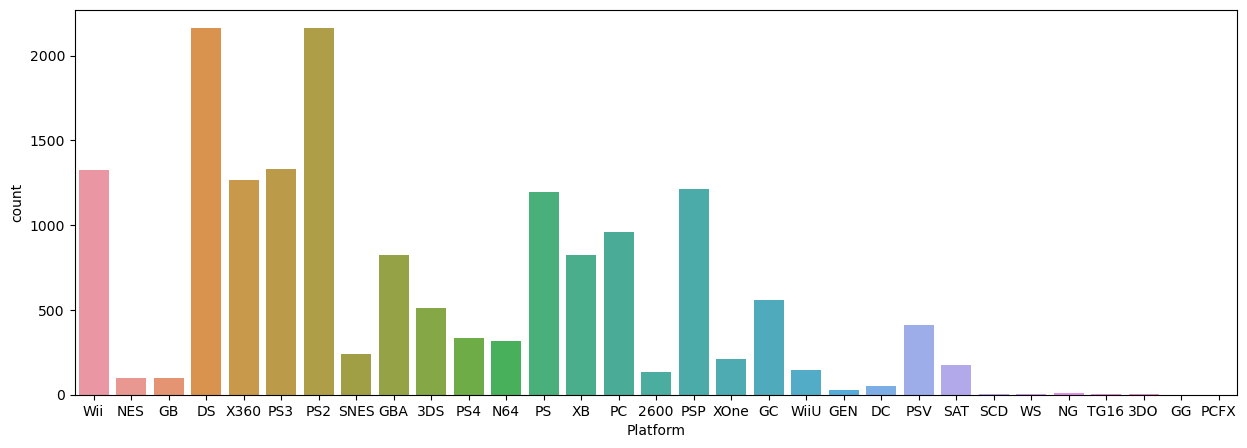

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(data= train, x="Platform")

### Multivariate Analysis

In [29]:
platform_bysales = train[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_bysales.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


### HYPOTHESIS TESTING

In [30]:
train.columns

Index(['Year', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'NA_Sales', 'Genre', 'Publisher', 'Platform'],
      dtype='object')

In [56]:
Genre_R = train[train["Genre"] == "Adventure"]
Genre_S = train[train["Genre"] == "transparent"]

In [57]:
t, p = stats.ttest_ind(Genre_R["Global_Sales"], Genre_S["Global_Sales"])

print(f't-value: {t}')
print(f'p-value: {p}')  

t-value: nan
p-value: nan


In [58]:
if p < 0.05:
    print("We reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


### Question 1. Which genre of video games has been published the most

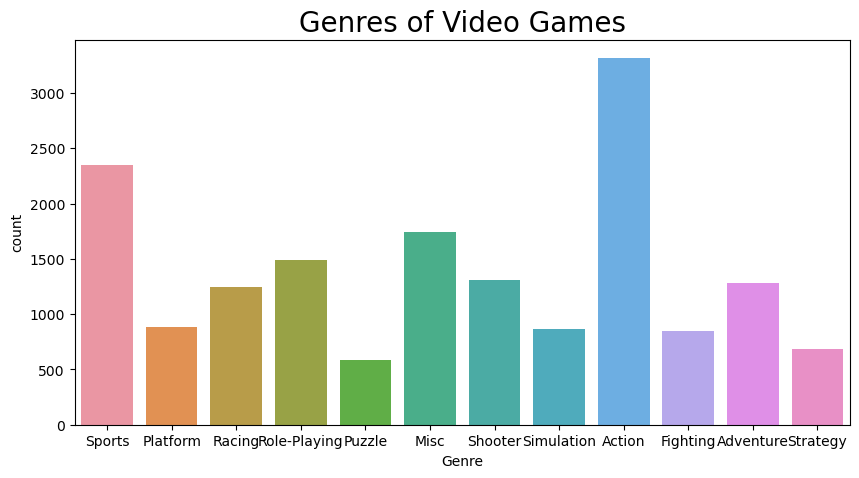

In [34]:
# The number of different shows and their value counts
plt.figure(figsize=(10,5))
sns.countplot(train["Genre"])
plt.title("Genres of Video Games", fontsize=20)
plt.show();

From the plot above the genre of video games published the most is Action, followed by sports,Misc,role playing, shooter and adventures

### Question 2. Which year had the most  video games release

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2006'),
  Text(3, 0, '2010'),
  Text(4, 0, '2007'),
  Text(5, 0, '2011'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2015'),
  Text(12, 0, '2014'),
  Text(13, 0, '2013'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2000'),
  Text(17, 0, '2016'),
  Text(18, 0, '1999'),
  Text(19, 0, '1997'),
  Text(20, 0, '1996'),
  Text(21, 0, '1995'),
  Text(22, 0, '1994'),
  Text(23, 0, '1993'),
  Text(24, 0, '1981'),
  Text(25, 0, '1992'),
  Text(26, 0, '1991'),
  Text(27, 0, '1982'),
  Text(28, 0, '1986'),
  Text(29, 0, '1989'),
  Text(30, 0, '1983'),
  Text(31, 0, '1987'),
  Text(32, 0, '1990'),
  Text(33, 0, '1988'),
  Text(34, 0, '1985'),
  Text(35, 0, '1984'),


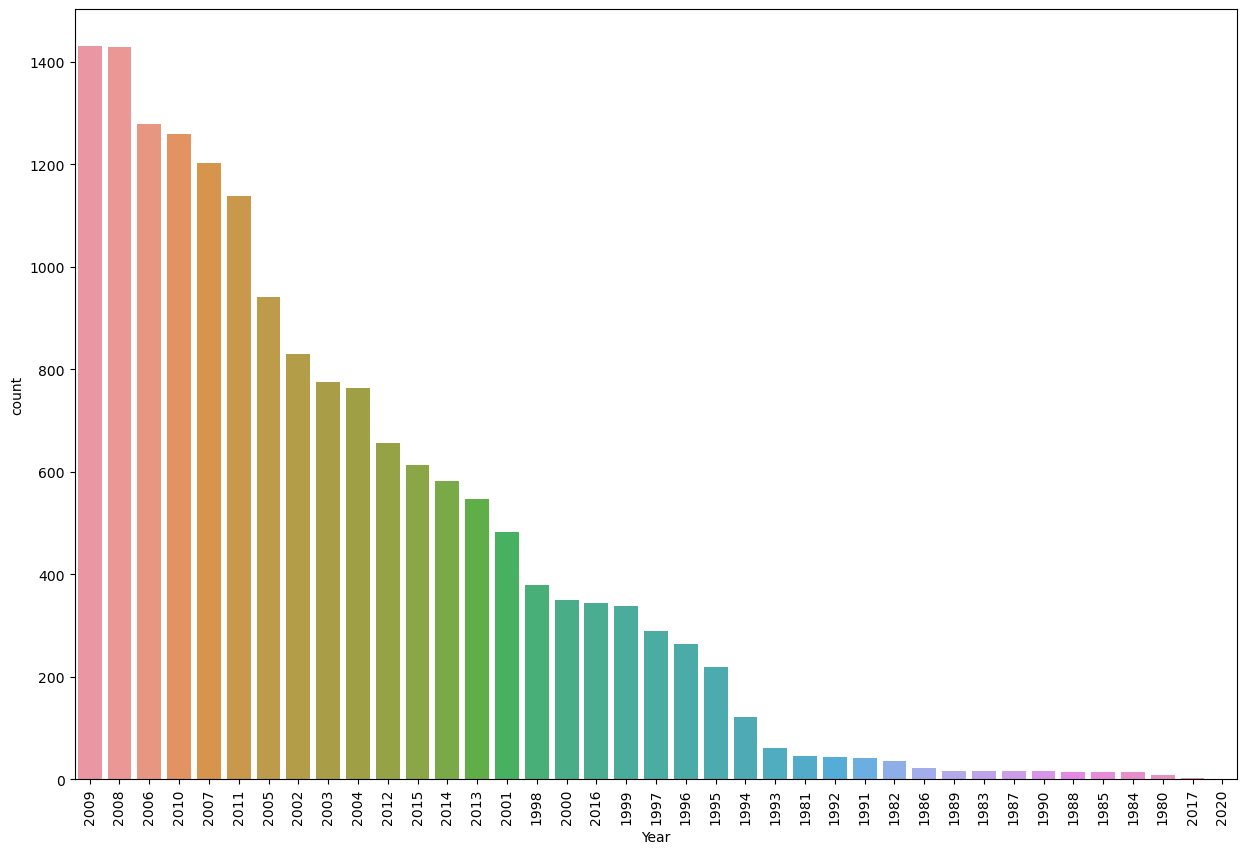

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=train, order = train.groupby(by=['Year'])['Genre'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

### Question 3 What are the genre of video games that have made the most sales globally

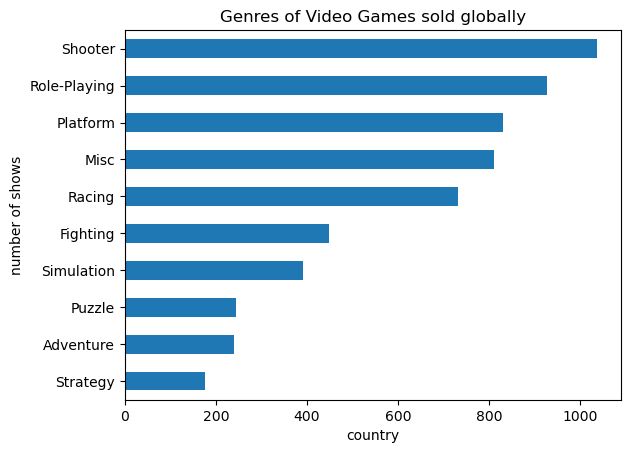

In [36]:
# in what year most produced show available in Netflix
country_year = train.groupby('Genre')['Global_Sales'].sum()

country_year.sort_values(ascending=True).iloc[:10].plot(kind='barh')
plt.title('Genres of Video Games sold globally')
plt.xlabel('country')
plt.ylabel('number of shows')
plt.show()

### Question 4 Who are top 10 video games publisher


In [37]:
Top_publishers = train .groupby(by = "Publisher").Global_Sales.agg(["sum"]).sort_values(by = ["sum"], 
                                                                                       ascending = False)
top_publishers = Top_publishers.iloc[:10]
top_publishers

,sum
Publisher,
Nintendo,1786.56
Electronic Arts,1125.20
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


Text(0.5, 1.0, 'TOP 10 PUBLISHERS')

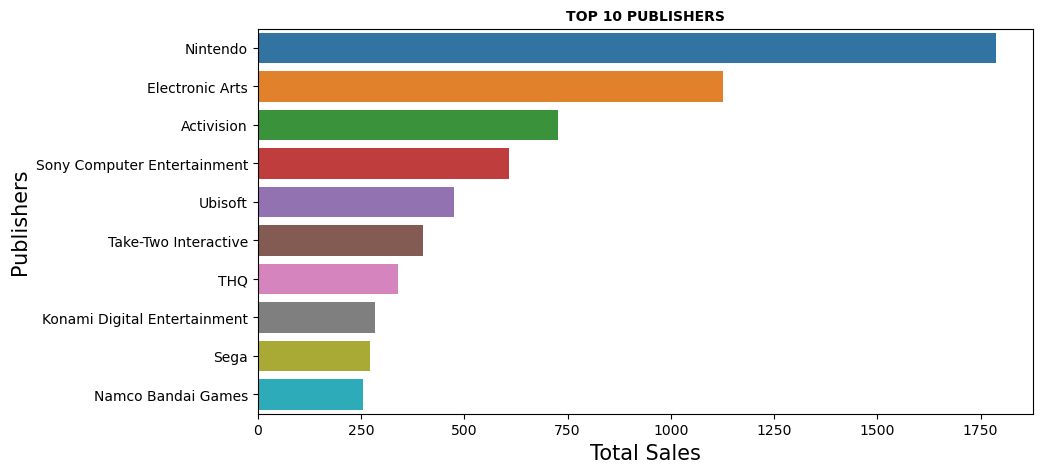

In [38]:
plt.figure(figsize = (10,5))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns.barplot(y =top_publishers [:10].index, x = (top_publishers ["sum"])[:10])
plt.ylabel('Publishers',fontsize = 15)
plt.xlabel("Total Sales",fontsize = 15)
plt.title('TOP 10 PUBLISHERS',fontsize = 10,fontweight = 'bold')

### Question5. Which country make the most sales

In [39]:
top_sale= train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_seller = top_sale.sum().reset_index()
top_sale_reg = top_seller.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


<AxesSubplot:xlabel='region', ylabel='sale'>

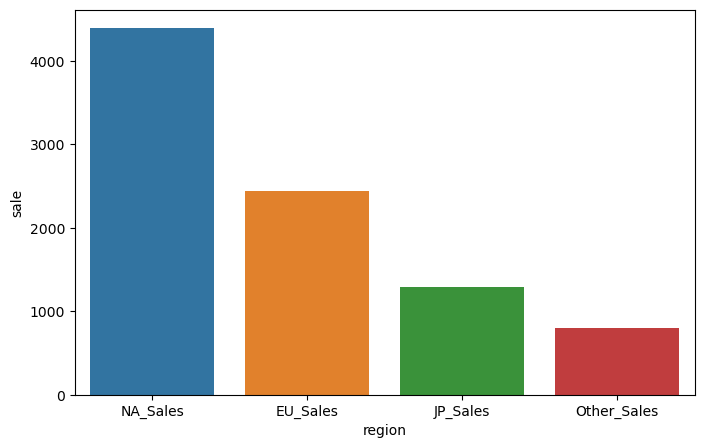

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='sale', data = top_sale_reg)

In [59]:
train.nunique()

Year             39
EU_Sales        305
JP_Sales        244
Other_Sales     157
Global_Sales    623
NA_Sales        409
Genre            12
Publisher       578
Platform         31
dtype: int64